In [22]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import statsmodels as st

In [23]:
dd=pd.read_csv(r'F:\VIRU\New folder\US.csv')

In [24]:
dd.head()

,months,sales
0,2013-1,1000
1,2013-2,1400
2,2013-3,1950
3,2013-4,2100
4,2013-5,2000


In [25]:
dd.tail()

,months,sales
91,2020-8,19000
92,2020-9,20900
93,2020-10,19600
94,2020-11,21650
95,2020-12,26950


In [26]:
dd['months']=pd.to_datetime(dd['months'])

In [27]:
dd.set_index('months',inplace=True)

<AxesSubplot:xlabel='months'>

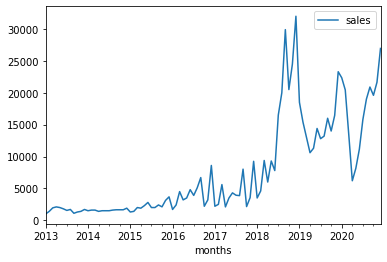

In [28]:
dd.plot()

In [29]:
from statsmodels.tsa.stattools import adfuller

In [30]:
dfuler = adfuller(dd['sales'])

In [31]:
dfuler
#p value <0.05 indicates stationary
#p value >0.05 indicates non stationary

(-0.15170359712767523,
 0.9440388862574188,
 12,
 83,
 {'1%': -3.5117123057187376,
  '5%': -2.8970475206326833,
  '10%': -2.5857126912469153},
 1576.7506408995562)

In [32]:
import statsmodels.api as sm

from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot

In [33]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

c:\users\personal\appdata\local\programs\python\python38\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


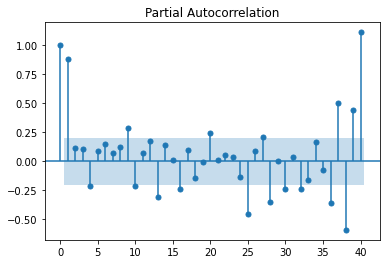

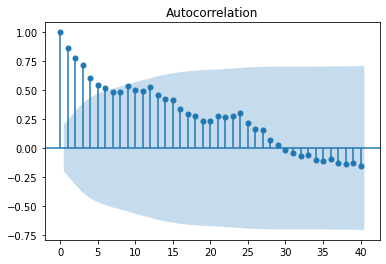

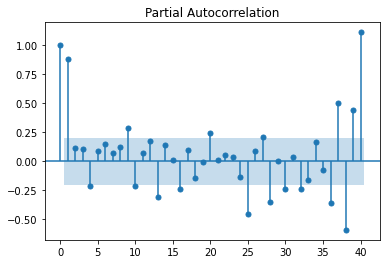

In [34]:
plot_acf(dd['sales'],lags=40)
plot_pacf(dd['sales'],lags=40)

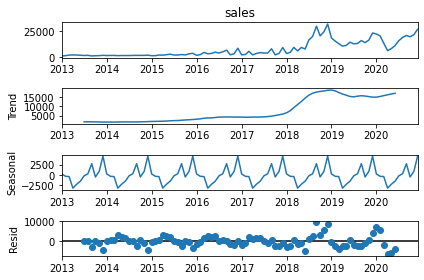

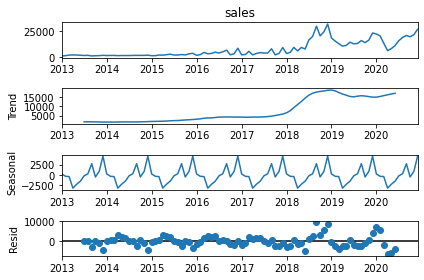

In [35]:
import statsmodels
decompose= statsmodels.tsa.seasonal.seasonal_decompose(dd['sales'])
decompose.plot()

In [36]:
import statsmodels.api as sm

In [37]:
models = sm.tsa.statespace.SARIMAX(dd['sales'],order=(0,1,6),seasonal_order=(0,1,2,12))
results=models.fit()

c:\users\personal\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\personal\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\personal\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\users\personal\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum 

In [38]:
dd['forecast']=results.predict(start=85,end=95,dynamic=True)

<AxesSubplot:xlabel='months'>

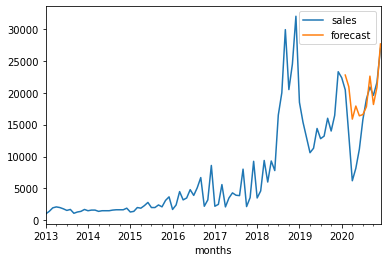

In [39]:
dd[['sales','forecast']].plot()

In [40]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                   sales   No. Observations:                   96
Model:             SARIMAX(0, 1, 6)x(0, 1, [1, 2], 12)   Log Likelihood                -780.263
Date:                                 Wed, 17 Mar 2021   AIC                           1578.526
Time:                                         23:07:39   BIC                           1600.296
Sample:                                     01-01-2013   HQIC                          1587.272
                                          - 12-01-2020                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1190      0.181     -0.659      0.510      -0.473       0.235
ma.L2         -0.0946      0.156     -0.607      0.544      -0.400       0.211
ma.L3         -0.1461      0.134     -1.094      0.274      -0.408       0.116
ma.L4         -0.0126      0.142     -0.089      0.929      -0.290       0.265
ma.L5         -0.4632      0.112     -4.123      0.000      -0.683      -0.243
ma.L6         -0.1616      0.089     -1.820      0.069      -0.336       0.012
ma.S.L12      -0.4122      0.100     -4.138      0.000      -0.607      -0.217
ma.S.L24       0.0315      0.124      0.254      0.799      -0.211       0.274
sigma2      8.287e+06   5.74e-08   1.44e+14      0.000    8.29e+06    8.29e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                11.94
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):              40.06   Skew:                             0.66
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.24e+28. Standard errors may be unstable.
"""

In [41]:
output=results.forecast(24)

In [42]:
output

2021-01-01    21290.877418
2021-02-01    21423.780879
2021-03-01    16911.462594
2021-04-01    11011.421060
2021-05-01    12549.223411
2021-06-01    15031.618459
2021-07-01    18125.555187
2021-08-01    20456.021084
2021-09-01    23415.298454
2021-10-01    20995.518624
2021-11-01    23303.523291
2021-12-01    29227.629654
2022-01-01    24126.081282
2022-02-01    23430.024199
2022-03-01    18802.325693
2022-04-01    12997.183358
2022-05-01    14615.477089
2022-06-01    17154.868409
2022-07-01    20351.947323
2022-08-01    22744.558106
2022-09-01    25612.630233
2022-10-01    23291.667804
2022-11-01    25578.998478
2022-12-01    31456.317411
Freq: MS, Name: predicted_mean, dtype: float64

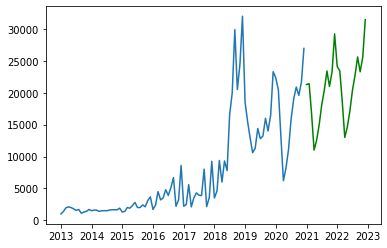

In [43]:
pyplot.plot(dd['sales'])
pyplot.plot(output,color='green')

In [44]:
from pandas.tseries.offsets import DateOffset

In [45]:
future_dates=[dd.index[-1]+DateOffset(months=x) for x in range(0,24)]

In [46]:
future_dates_dd = pd.DataFrame(index=future_dates[1:],columns=dd.columns)

In [47]:
future_dates_dd.tail()

,sales,forecast
2022-07-01,NaN,NaN
2022-08-01,NaN,NaN
2022-09-01,NaN,NaN
2022-10-01,NaN,NaN
2022-11-01,NaN,NaN


In [48]:
future_dd=pd.concat([dd,future_dates_dd])

In [53]:
future_dd['forecast']=results.predict(start=94,end=117,dynamic=True)

<AxesSubplot:>

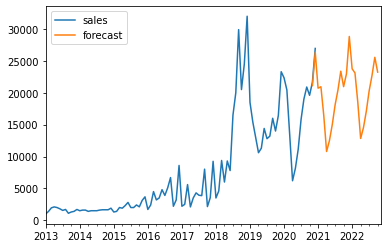

In [54]:
future_dd[['sales','forecast']].plot()